# The Battle of Neighborhoods
By Eylul Tekin

## I. Introduction
There is a new startup company that plans to launch an application of food delivery service similar to Postmates, Doordash and Uber Eats. To pilot their application, the company will launch their application in one of the cities listed below:

1. New York City
2. San Francisco
3. Los Angeles
4. Chicago

The goal of this new startup is to decide which metropolitan city is the better to invest and launch their first market. The success of a market can be predicted by various factors, one important factor being the availability of options to deliver from. The current trends in the market is another important predictor. Because the target audience of the startup is younger users who are quite familiar with online apps as well as food delivery services, the their food preferences are of higher priority. Based on recent research, consumers between the ages of 18 and 34 are especially interested in trying diverse cuisines. In addition, survey research conducted by Technomic indicate that more than half of Americans are more interested in trying different cuisines than they were one year ago. Thus, the objective is to identify the best metropolitan city to launch the pilot online food delivery service based on various and diverse cuisine options available within each city. 

Business Problem: Which city has a more diverse restaurant scene that will boost the potential success of the initial launch?  

To address the business problem at hand, I will obtain different groups (or clusters) of restaurants within each city. The number of optimal clusters can be utilized as an indicator of a diverse restaurant scenes. Furthermore, the content of each cluster as well as the number of members within each cluster can be used as other indicators of diversity. For instance, if the clusters within a city are too similar, then we can conclude that the culinary scene is not as diverse. For this problem, I will use descriptive modeling to describe existing culinary scene within each city. More specifically, I will use k-means cluster analyses to determine how many clusters of restaurants there are within each city and the content and diversity of each cluster. The frequencies of different food venues within a city will be used in k-means cluster analyses.

## II. Data

Location data as well as food venue data is necessary to address the business problem. I will first acquire location data for each city. Neighborhoods will be the level of analyses. Thus, I need a list of neighborhoods in each city as well as their coordinates (i.e., latitudes and longitudes). If the neighborhood and location information is readily available in a dataset, I will use that information. If not, I will use the library geopy to obtain this information. Below I present the sources where I obtained the neighborhood and location data from:

#### 1. New York City

For New York City, the list of neighborhoods and their locations were readily available in the link. From this link, I will filter neighborhood, latitude, and longitude information and create a new dataset:

https://cocl.us/new_york_dataset

#### 2. San Francisco

To get the list of neighborhoods in San Francisco, I used the following Wikipedia link. I will use libraries `BeautifulSoup` and `geopy` to get the neighborhood list and coordinates, respectively.

https://en.wikipedia.org/wiki/List_of_neighborhoods_in_San_Francisco

#### 3. Los Angeles

To get the list of neighborhoods in Los Angeles, I used the following Wikipedia link. As with San Francisco, I will use the library `geopy` to get the neighborhood list and coordinates, respectively.

https://en.wikipedia.org/wiki/List_of_districts_and_neighborhoods_of_Los_Angeles

#### 4. Chicago

To get the list of neighborhoods in Chicago, I used the following Wikipedia link. I will use the library `geopy` to get the neighborhood list and coordinates, respectively.

https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago

Then using neighborhood and location data, I will get the services of Foursquare API to acquire the types of restaurant that exist within each neighborhood of three cities. Given the goal of the peoject, I will limit my search to 'restaurants'. By using frequencies of restaurant categories within each neighborhood and the machine learning algorithm, clustering, I aim to identify diverse restaurant clusters within each city and examine their content. 


Results section where you discuss the results.  
Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.  
Conclusion section where you conclude the report.  

## III. Methodology
### Data Preprocessing
In this section we will use the links listed above and get the datasets for each city ready.   
First let's import the necessary libraries.

In [645]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
from bs4 import BeautifulSoup #for getting html data from links
from sklearn.cluster import KMeans # import k-means from clustering stage
import matplotlib.cm as cm # Matplotlib and associated plotting modules
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import folium # map rendering library
import seaborn as sns #for 

print('Libraries imported.')

Libraries imported.


In [217]:
#let's set up Foursquare API information
CLIENT_ID = 'MIHEDSXK0WTKILC4SCDWPVGT531TEDS22XH512K21C3FPBPS' # your Foursquare ID
CLIENT_SECRET = 'L3QWKP23AMDEHONMVTYIQJI3T2DW0K1GJFOZJ4HDRWNHG5BI' # your Foursquare Secret
VERSION = '20200418' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: MIHEDSXK0WTKILC4SCDWPVGT531TEDS22XH512K21C3FPBPS
CLIENT_SECRET:L3QWKP23AMDEHONMVTYIQJI3T2DW0K1GJFOZJ4HDRWNHG5BI


#### 1. New York City
The link indicated above already has the neighborhood and coordinate information for New York City.

In [208]:
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)
NYC_data = newyork_data['features']
NYC_data[0] #check what it looks like

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [209]:
# define the dataframe columns
column_names = ['Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
NYC_neig = pd.DataFrame(columns=column_names)

#fill in the dataset using json file
for data in NYC_data:
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    NYC_neig = NYC_neig.append({'Neighborhood': neighborhood_name,
                                'Latitude': neighborhood_lat,
                                'Longitude': neighborhood_lon}, ignore_index=True)

In [210]:
#let's see what our dataset looks like
NYC_neig.head()

,Neighborhood,Latitude,Longitude
0,Wakefield,40.894705,-73.847201
1,Co-op City,40.874294,-73.829939
2,Eastchester,40.887556,-73.827806
3,Fieldston,40.895437,-73.905643
4,Riverdale,40.890834,-73.912585


In [211]:
#basic properties of our dataset
print('There are {} neighborhoods in New York City.'.format(NYC_neig.shape[0]))

There are 306 neighborhoods in New York City.


In [212]:
#get the coordinates for the city
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


__Test trial__  
Before getting the food venues for all neighborhoods let's try it on the first neighborhood of our dataset: Wakefield.

In [213]:
neighborhood_latitude = NYC_neig.loc[0, 'Latitude'] # neighborhood latitude value
neighborhood_longitude = NYC_neig.loc[0, 'Longitude'] # neighborhood longitude value

neighborhood_name = NYC_neig.loc[0, 'Neighborhood'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(neighborhood_name, 
                                                               neighborhood_latitude, 
                                                               neighborhood_longitude))

Latitude and longitude values of Wakefield are 40.89470517661, -73.84720052054902.


In [218]:
num_ven = 100 #how many venues I would like to get
radius = 1000 #what is the search radius
food_id = '4d4b7105d754a06374d81259' #venue category id for food

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    neighborhood_latitude, 
    neighborhood_longitude, 
    radius, 
    num_ven,
    food_id)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=MIHEDSXK0WTKILC4SCDWPVGT531TEDS22XH512K21C3FPBPS&client_secret=L3QWKP23AMDEHONMVTYIQJI3T2DW0K1GJFOZJ4HDRWNHG5BI&v=20200418&ll=40.89470517661,-73.84720052054902&radius=500&limit=100&categoryId=4d4b7105d754a06374d81259'

In [215]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [219]:
results = requests.get(url).json()
venues = results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues) # flatten JSON
# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)
# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

,name,categories,lat,lng
0,Dunkin',Donut Shop,40.890459,-73.849089
1,SUBWAY,Sandwich Place,40.890468,-73.849152
2,Pitman Deli,Food,40.894149,-73.845748
3,Central Deli,Deli / Bodega,40.896728,-73.844387
4,Louis Pizza,Pizza Place,40.898399,-73.848810


In [220]:
nearby_venues

,name,categories,lat,lng
0,Dunkin',Donut Shop,40.890459,-73.849089
1,SUBWAY,Sandwich Place,40.890468,-73.849152
2,Pitman Deli,Food,40.894149,-73.845748
3,Central Deli,Deli / Bodega,40.896728,-73.844387
4,Louis Pizza,Pizza Place,40.898399,-73.848810


This seems to work! Now let's do it for all of the neighborhoods.

In [221]:
#function to do it for all neighborhoods
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&categoryId={}'.format(
                CLIENT_ID, 
                CLIENT_SECRET, 
                VERSION, 
                lat, 
                lng, 
                radius, 
                num_ven,
                food_id)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [222]:
#Let's create this dataframe
NYC_venues = getNearbyVenues(names=NYC_neig['Neighborhood'], latitudes=NYC_neig['Latitude'], longitudes=NYC_neig['Longitude'])

In [223]:
NYC_venues.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Wakefield,40.894705,-73.847201,Ripe Kitchen & Bar,40.898152,-73.838875,Caribbean Restaurant
1,Wakefield,40.894705,-73.847201,Ali's Roti Shop,40.894036,-73.856935,Caribbean Restaurant
2,Wakefield,40.894705,-73.847201,Jackie's West Indian Bakery,40.889283,-73.843310,Caribbean Restaurant
3,Wakefield,40.894705,-73.847201,Jimbo's,40.891740,-73.858226,Burger Joint
4,Wakefield,40.894705,-73.847201,Dunkin',40.890459,-73.849089,Donut Shop
5,Wakefield,40.894705,-73.847201,SUBWAY,40.890468,-73.849152,Sandwich Place
6,Wakefield,40.894705,-73.847201,E&L Bakery,40.893564,-73.856997,Bakery
7,Wakefield,40.894705,-73.847201,Popeyes Louisiana Kitchen,40.898292,-73.854719,Fried Chicken Joint
8,Wakefield,40.894705,-73.847201,Subway,40.897792,-73.855219,Sandwich Place
9,Wakefield,40.894705,-73.847201,Domino's Pizza,40.898443,-73.854851,Pizza Place


In [229]:
#save it to csv so I do not have to request it from Foursquare API each time I rerun the notebook
NYC_venues.to_csv(r'/Users/eylul/Repo/Coursera_Capstone/NYC_venues.csv', index = False, header=True)

In [231]:
#basic properties of our dataset
print('There are {} uniques categories.'.format(len(NYC_venues['Venue Category'].unique())))
NYC_venues.groupby('Neighborhood').count().head()

There are 138 uniques categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Allerton,66,66,66,66,66,66
Annadale,17,17,17,17,17,17
Arden Heights,11,11,11,11,11,11
Arlington,13,13,13,13,13,13
Arrochar,19,19,19,19,19,19


#### 2. San Francisco
I will first create a list of neighborhoods for San Francisco using `BeautifulSoup` , and then use `geopy` to get coordinates. Lastly, I will use Foursquare API to get food venues.

In [297]:
SF_data = requests.get("https://en.wikipedia.org/wiki/Category:Neighborhoods_in_San_Francisco").text
soup = BeautifulSoup(SF_data, 'html.parser')

In [300]:
neighborhoodlist = []
for i in soup.find_all('div', class_='tocright')[0].find_all('a'):
    neighborhoodlist.append(i.text)

In [299]:
#Creating a dataframe from the list
SF_neig = pd.DataFrame({'Neighborhood': neighborhoodlist})
SF_neig.head()

,Neighborhood
0,1 Alamo Square
1,2 Anza Vista
2,3 Ashbury Heights
3,4 Balboa Park
4,5 Balboa Terrace


In [301]:
SF_neig.tail()

,Neighborhood
118,119 Yerba Buena
119,120 See also
120,121 References
121,122 External links
122,122.1 Specific neighborhoods


In [302]:
#get rid of the last four row
SF_neig.drop([119,120,121,122], axis = 0, inplace = True)
SF_neig.tail()

,Neighborhood
114,115 West Portal
115,116 Western Addition
116,117 Westwood Highlands
117,118 Westwood Park
118,119 Yerba Buena


In [303]:
#only keep the neighborhood name. delete the number before
for i, neig in zip(range(0,len(SF_neig['Neighborhood'])), SF_neig['Neighborhood']):
        SF_neig['Neighborhood'][i] = neig.split(' ', 1)[1]
SF_neig.head(20)

,Neighborhood
0,Alamo Square
1,Anza Vista
2,Ashbury Heights
3,Balboa Park
4,Balboa Terrace
5,Bayview
6,Belden Place
7,Bernal Heights
8,Buena Vista
9,Butchertown (Old and New)


In [304]:
#basic properties of our dataset
print('There are {} neighborhoods in San Francisco.'.format(SF_neig.shape[0]))

There are 119 neighborhoods in San Francisco.


In [305]:
#create new empty columns for latitude and longitude
SF_neig["Latitude"] = ""
SF_neig["Longitude"] = ""
SF_neig["Location"] = ""

In [310]:
for i, neig in zip(range(0,len(SF_neig['Neighborhood'])), SF_neig['Neighborhood']):
    address = '{}, San Francisco, California'.format(SF_neig['Neighborhood'][i])
    try:     
        geolocator = Nominatim(user_agent="sf_explorer")
        location = geolocator.geocode(address)
        SF_neig.loc[i,"Location"] = str(location)
        SF_neig.loc[i,"Latitude"] = location.latitude
        SF_neig.loc[i,"Longitude"] = location.longitude
    except AttributeError:
        continue
SF_neig.head(10)        

,Neighborhood,Latitude,Longitude,Location
0,Alamo Square,37.7764,-122.435,"Alamo Square, Pierce Street, Western Addition,..."
1,Anza Vista,37.7808,-122.443,"Anza Vista, San Francisco, San Francisco City ..."
2,Balboa Park,37.7214,-122.448,"Balboa Park, Geneva Avenue, Ingleside, San Fra..."
3,Bayview,37.7289,-122.392,"Bayview, Lane Street, Bayview District, San Fr..."
4,Belden Place,37.7917,-122.404,"Belden Place, Union Square, San Francisco, San..."
5,Bernal Heights,37.743,-122.416,"Bernal Heights, San Francisco, San Francisco C..."
6,Buena Vista,37.8065,-122.421,"Buena Vista, Hyde Street, Russian Hill, San Fr..."
7,Castro,37.7609,-122.435,"Castro District, San Francisco, San Francisco ..."
8,China Basin,37.7763,-122.392,"China Basin, San Francisco, San Francisco City..."
9,Chinatown,37.7943,-122.406,"Chinatown, San Francisco, San Francisco City a..."


Above, we see that sometimes the location is wrong or missing. For instance, for Balboa Terrace, the function is finding a location in San Diego but not in San Francisco. To be able to analyze our data properly, we need to eliminate these.

In [665]:
#ensure that each row includes San Francisco within its location
SF_neig = SF_neig[SF_neig["Location"].str.contains('San Francisco')]
SF_neig.reset_index(drop=True, inplace = True)
SF_neig.drop('Location', axis  = 1, inplace = True)
#SF_neig.head()

In [308]:
#basic properties of our dataset
print('After preprocessing San Francisco, there are {} neighborhoods in San Francisco.'.format(SF_neig.shape[0]))

After preprocessing San Francisco, there are 83 neighborhoods in San Francisco.


In [241]:
#Let's create San Francisco dataframe using Foursquare API
SF_venues = getNearbyVenues(names=SF_neig['Neighborhood'], latitudes=SF_neig['Latitude'], longitudes=SF_neig['Longitude'])

In [242]:
SF_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Alamo Square,37.77636,-122.434689,The Mill,37.776425,-122.437970,Bakery
1,Alamo Square,37.77636,-122.434689,Nopa,37.774888,-122.437532,New American Restaurant
2,Alamo Square,37.77636,-122.434689,4505 Burgers & BBQ,37.776125,-122.438142,BBQ Joint
3,Alamo Square,37.77636,-122.434689,Souvla,37.774577,-122.437809,Souvlaki Shop
4,Alamo Square,37.77636,-122.434689,Bar Crudo,37.775707,-122.438019,Seafood Restaurant


In [244]:
#save it to csv so I do not have to request it from Foursquare API each time I rerun the notebook
SF_venues.to_csv(r'/Users/eylul/Repo/Coursera_Capstone/SF_venues.csv', index = False, header=True)

In [245]:
#basic properties of our dataset
print('There are {} uniques categories.'.format(len(SF_venues['Venue Category'].unique())))
SF_venues.groupby('Neighborhood').count().head()

There are 118 uniques categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alamo Square,62,62,62,62,62,62
Anza Vista,100,100,100,100,100,100
Balboa Park,85,85,85,85,85,85
Barbary Coast,100,100,100,100,100,100
Bayview,46,46,46,46,46,46


#### 3. Los Angeles
I will first create a list of neighborhoods for Los Angeles using `BeautifulSoup`, and then use `geopy` to get coordinates. Lastly, I will use Foursquare API to get food venues.

In [379]:
LA_data = requests.get("https://en.wikipedia.org/wiki/List_of_districts_and_neighborhoods_of_Los_Angeles").text
soup = BeautifulSoup(LA_data, 'html.parser')

In [380]:
neighborhoodlist_1 = []
for i in soup.find_all('div', class_='div-col columns column-width')[0].find_all('a'):
    neighborhoodlist_1.append(i.text)
neighborhoodlist_2 = []
for i in soup.find_all('div', class_='div-col columns column-width')[1].find_all('a'):
    neighborhoodlist_2.append(i.text)
neighborhoodlist = neighborhoodlist_1 + neighborhoodlist_2

In [381]:
#Creating a dataframe from the list
LA_neig = pd.DataFrame({'Neighborhood': neighborhoodlist})
LA_neig.tail()

,Neighborhood
252,Windsor Square
253,Winnetka
254,Woodland Hills
255,Yucca Corridor
256,[50]


In [382]:
#only keep the neighborhood name, delete names after ,
for i, neig in zip(range(0,len(LA_neig['Neighborhood'])), LA_neig['Neighborhood']):
        LA_neig['Neighborhood'][i] = neig.split(',', 1)[0]

In [383]:
#delete numbers that pop up in the rows
LA_neig = LA_neig[~LA_neig["Neighborhood"].str.contains(']')]
LA_neig.reset_index(drop=True, inplace = True)

In [384]:
#basic properties of our dataset
print('There are {} neighborhoods in Los Angeles.'.format(LA_neig.shape[0]))

There are 199 neighborhoods in Los Angeles.


In [385]:
#create new empty columns for latitude and longitude
LA_neig["Latitude"] = ""
LA_neig["Longitude"] = ""
LA_neig["Location"] = ""

In [386]:
for i, neig in zip(range(0,len(LA_neig['Neighborhood'])), LA_neig['Neighborhood']):
    address = '{}, San Los Angeles, California'.format(LA_neig['Neighborhood'][i])
    try:     
        geolocator = Nominatim(user_agent="la_explorer")
        location = geolocator.geocode(address)
        LA_neig.loc[i,"Location"] = str(location)
        LA_neig.loc[i,"Latitude"] = location.latitude
        LA_neig.loc[i,"Longitude"] = location.longitude
    except AttributeError:
        continue
LA_neig.head(10)        

,Neighborhood,Latitude,Longitude,Location
0,Angelino Heights,34.0703,-118.255,"Angelino Heights, Echo Park, Los Angeles, Los ..."
1,Angeles Mesa,34.1358,-118.08,"East California Boulevard, Chapman Woods, West..."
2,Angelus Vista,,,None
3,Arleta,34.2413,-118.432,"Arleta, Los Angeles, Los Angeles County, Calif..."
4,Arlington Heights,34.0435,-118.321,"Arlington Heights, Los Angeles, Los Angeles Co..."
5,Arts District,34.0412,-118.234,"Arts District, Downtown, Los Angeles, Los Ange..."
6,Atwater Village,34.1187,-118.262,"Atwater Village, Los Angeles, Los Angeles Coun..."
7,Baldwin Hills,,,None
8,Baldwin Hills/Crenshaw,34.0076,-118.351,"Baldwin Hills/Crenshaw, Los Angeles, Los Angel..."
9,Baldwin Village,,,None


Above, we see that sometimes the location is wrong or missing. For instance, for Angelus Vista, no location was retrieved. We need to eliminate these neighborhoods.

In [387]:
#ensure that each row includes Los Angeles within its location
LA_neig = LA_neig[LA_neig["Location"].str.contains('Los Angeles')]
LA_neig.reset_index(drop=True, inplace = True)
LA_neig.drop('Location', axis  = 1, inplace = True)

In [389]:
#basic properties of our dataset
print('After preprocessing Los Angeles, there are {} neighborhoods in Los Angeles.'.format(LA_neig.shape[0]))

After preprocessing Los Angeles, there are 145 neighborhoods in Los Angeles.


In [390]:
#Let's create Los Angeles dataframe using Foursquare API
LA_venues = getNearbyVenues(names=LA_neig['Neighborhood'], latitudes=LA_neig['Latitude'], longitudes=LA_neig['Longitude'])

In [391]:
LA_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Angelino Heights,34.070289,-118.254796,Guisados,34.070262,-118.250437,Taco Place
1,Angelino Heights,34.070289,-118.254796,Tsubaki,34.072938,-118.251298,Japanese Restaurant
2,Angelino Heights,34.070289,-118.254796,Konbi,34.075383,-118.253893,Japanese Restaurant
3,Angelino Heights,34.070289,-118.254796,Leo's Tacos,34.067743,-118.260974,Taco Place
4,Angelino Heights,34.070289,-118.254796,Ostrich Farm,34.076272,-118.255919,American Restaurant


In [392]:
LA_venues.to_csv(r'/Users/eylul/Repo/Coursera_Capstone/LA_venues.csv', index = False, header=True)

In [394]:
#basic properties of our final dataset
print('There are {} uniques categories.'.format(len(LA_venues['Venue Category'].unique())))
LA_venues.groupby('Neighborhood').count().head()

There are 104 uniques categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Angeles Mesa,11,11,11,11,11,11
Angelino Heights,60,60,60,60,60,60
Arleta,7,7,7,7,7,7
Arlington Heights,40,40,40,40,40,40
Arts District,95,95,95,95,95,95


#### 4. Chicago
I will first create a list of neighborhoods for Chicago, and then use `geopy` to get coordinates. Lastly, I will use Foursquare API to get food venues.

In [326]:
CHI_data = pd.read_html('https://en.wikipedia.org/wiki/List_of_neighborhoods_in_Chicago')[0]
CHI_data.head()

,Neighborhood,Community area
0,Albany Park,Albany Park
1,Altgeld Gardens,Riverdale
2,Andersonville,Edgewater
3,Archer Heights,Archer Heights
4,Armour Square,Armour Square


In [327]:
#basic properties of our dataset
CHI_neig = pd.DataFrame(CHI_data)
print('There are {} neighborhoods in Chicago.'.format(CHI_neig.shape[0]))

There are 246 neighborhoods in Chicago.


In [328]:
#let's drop community area
CHI_neig.drop('Community area', axis = 1, inplace = True)
#create new empty columns for latitude and longitude
CHI_neig["Latitude"] = ""
CHI_neig["Longitude"] = ""
CHI_neig["Location"] = ""

In [329]:
for i, neig in zip(range(0,len(CHI_neig['Neighborhood'])), CHI_neig['Neighborhood']):
    address = '{}, Chicago, Illinois'.format(CHI_neig['Neighborhood'][i])
    try:     
        geolocator = Nominatim(user_agent="sf_explorer")
        location = geolocator.geocode(address)
        CHI_neig.loc[i,"Location"] = str(location)
        CHI_neig.loc[i,"Latitude"] = location.latitude
        CHI_neig.loc[i,"Longitude"] = location.longitude
    except AttributeError:
        continue
CHI_neig.head(10)        

,Neighborhood,Latitude,Longitude,Location
0,Albany Park,41.9719,-87.7162,"Albany Park, Chicago, Cook County, Illinois, 6..."
1,Altgeld Gardens,41.6549,-87.6004,"Altgeld Gardens, Riverdale, Chicago, Cook Coun..."
2,Andersonville,41.9771,-87.6693,"5233, Summerdale, Edgewater, Chicago, Cook Cou..."
3,Archer Heights,41.8114,-87.7262,"Archer Heights, Chicago, Cook County, Illinois..."
4,Armour Square,41.84,-87.6331,"Armour Square, Chicago, Cook County, Illinois,..."
5,Ashburn,41.7475,-87.7112,"Ashburn, Chicago, Cook County, Illinois, 60652..."
6,Ashburn Estates,,,None
7,Auburn Gresham,41.7434,-87.656,"Auburn Gresham, Chicago, Cook County, Illinois..."
8,Avalon Park,41.745,-87.5887,"Avalon Park, Chicago, Cook County, Illinois, 6..."
9,Avondale,41.9389,-87.7112,"Avondale, Chicago, Cook County, Illinois, 6061..."


Above, we see that sometimes the location is wrong or missing. For instance, for Ashburn Estates, no location was retrieved.

In [330]:
#ensure that each row includes Chicago within its location
CHI_neig = CHI_neig[CHI_neig["Location"].str.contains('Chicago')]
CHI_neig.reset_index(drop=True, inplace = True)
CHI_neig.drop('Location', axis  = 1, inplace = True)
#CHI_neig.head()

In [489]:
#basic properties of our dataset
print('After preprocessing Chicago, there are {} neighborhoods in Chicago.'.format(len(CHI_neig)))

After preprocessing Chicago, there are 225 neighborhoods in Chicago.


In [320]:
#Let's create Chicago dataframe using Foursquare API
CHI_venues = getNearbyVenues(names=CHI_neig['Neighborhood'], latitudes=CHI_neig['Latitude'], 
                             longitudes=CHI_neig['Longitude'])

In [491]:
CHI_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Albany Park,41.971937,-87.716174,Tre Kronor,41.975842,-87.711037,Scandinavian Restaurant
1,Albany Park,41.971937,-87.716174,Great Sea Chinese Restaurant,41.968496,-87.710678,Chinese Restaurant
2,Albany Park,41.971937,-87.716174,Merla's Kitchen,41.976063,-87.713559,Restaurant
3,Albany Park,41.971937,-87.716174,2 Asian Brothers,41.975832,-87.709655,Vietnamese Restaurant
4,Albany Park,41.971937,-87.716174,Peking Mandarin Resturant,41.968292,-87.715783,Chinese Restaurant


In [322]:
#save it to csv so I do not have to request it from Foursquare API each time I rerun the notebook
CHI_venues.to_csv(r'/Users/eylul/Repo/Coursera_Capstone/CHI_venues.csv', index = False, header=True)

In [323]:
#basic properties of our dataset
print('There are {} uniques categories.'.format(len(CHI_venues['Venue Category'].unique())))
CHI_venues.groupby('Neighborhood').count().head()

There are 110 uniques categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Albany Park,63,63,63,63,63,63
Altgeld Gardens,3,3,3,3,3,3
Andersonville,100,100,100,100,100,100
Archer Heights,23,23,23,23,23,23
Armour Square,46,46,46,46,46,46


##### __Now we have 4 datasets from 4 cities ready with neighborhoods and food venues in each neighborhood!__  
Let's create maps for each city.  
### Visualization
#### 1. New York City

In [563]:
NYC_address = 'New York City, NY'
geolocator = Nominatim(user_agent="n_explorer")
NYC_location = geolocator.geocode(NYC_address)
NYC_latitude = NYC_location.latitude
NYC_longitude = NYC_location.longitude     

In [564]:
# create map of New York using latitude and longitude values
map_nyc = folium.Map(location=[NYC_latitude, NYC_longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(NYC_neig['Latitude'], NYC_neig['Longitude'], NYC_neig['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_nyc)  
    
map_nyc

#### 2. San Francisco

In [565]:
SF_address = 'San Francisco, California, USA'
geolocator = Nominatim(user_agent="sf_explorer")
SF_location = geolocator.geocode(SF_address)
SF_latitude = SF_location.latitude
SF_longitude = SF_location.longitude     

In [500]:
# create map of New York using latitude and longitude values
map_sf = folium.Map(location=[SF_latitude, SF_longitude], zoom_start=12)

# add markers to map
for lat, lng, label in zip(SF_neig['Latitude'], SF_neig['Longitude'], SF_neig['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='orange',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_sf)  
    
map_sf

### 3. Los Angeles

In [566]:
LA_address = 'Los Angeles, California, USA'
geolocator = Nominatim(user_agent="la_explorer")
LA_location = geolocator.geocode(LA_address)
LA_latitude = LA_location.latitude
LA_longitude = LA_location.longitude     

In [567]:
# create map of New York using latitude and longitude values
map_la = folium.Map(location=[LA_latitude, LA_longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(LA_neig['Latitude'], LA_neig['Longitude'], LA_neig['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.5,
        parse_html=False).add_to(map_la)  
    
map_la

### 4. Chicago

In [568]:
address = 'Chicago, Illinois, USA'
geolocator = Nominatim(user_agent="chi_explorer")
CHI_location = geolocator.geocode(address)
CHI_latitude = CHI_location.latitude
CHI_longitude = CHI_location.longitude     

In [569]:
map_chi = folium.Map(location = [CHI_latitude,CHI_longitude], zoom_start = 10)

# add markers to map
for label, lat, lng in zip(CHI_neig['Neighborhood'], CHI_neig['Latitude'], CHI_neig['Longitude']):
    label = folium.Popup(label, parse_html = True)
    folium.CircleMarker(
    [lat,lng],
    radius = 5,
    popup = label,
    color = 'purple',
    fill = True,
    fill_color = '#3186cc',
    fill_opacity=0.5,
    parse_html=False).add_to(map_chi)  
    
map_chi

### Data Transformation
In this section, I will use dummy coding to prepare the datasets for cluster analysis. I will do this collectively for each city, and then display the final dataset for each city.

In [543]:
# one hot encoding
NYC_onehot = pd.get_dummies(NYC_venues[['Venue Category']], prefix="", prefix_sep="")
SF_onehot = pd.get_dummies(SF_venues[['Venue Category']], prefix="", prefix_sep="")
LA_onehot = pd.get_dummies(LA_venues[['Venue Category']], prefix="", prefix_sep="")
CHI_onehot = pd.get_dummies(CHI_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
NYC_onehot['Neighborhood'] = NYC_venues['Neighborhood'] 
SF_onehot['Neighborhood'] = SF_venues['Neighborhood'] 
LA_onehot['Neighborhood'] = LA_venues['Neighborhood'] 
CHI_onehot['Neighborhood'] = CHI_venues['Neighborhood'] 

# move neighborhood column to the first column
NYC_onehot = NYC_onehot[[NYC_onehot.columns[-1]] + list(NYC_onehot.columns[:-1])]
SF_onehot = SF_onehot[[SF_onehot.columns[-1]] + list(SF_onehot.columns[:-1])]
LA_onehot = LA_onehot[[LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])]
CHI_onehot = CHI_onehot[[CHI_onehot.columns[-1]] + list(CHI_onehot.columns[:-1])]

#let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category
NYC_grouped = NYC_onehot.groupby('Neighborhood').mean().reset_index()
SF_grouped = SF_onehot.groupby('Neighborhood').mean().reset_index()
LA_grouped = LA_onehot.groupby('Neighborhood').mean().reset_index()
CHI_grouped = CHI_onehot.groupby('Neighborhood').mean().reset_index()

In [437]:
#Display
NYC_grouped.head(2)

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Caucasian Restaurant,Cha Chaan Teng,Chaat Place,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Czech Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dosa Place,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hong Kong Restaurant,Hot Dog Joint,Hotpot Restaurant,Hunan Restaurant,Indian Restaurant,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Kofte Place,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Lebanese Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern Greek Restaurant,Molecular Gastronomy Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pet Café,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Romanian Restaurant,Russian Restaurant,Salad Place,Salvadoran Restaurant,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Snack Place,Soba Restaurant,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Sri Lankan Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Tibetan Restaurant,Turkish Restaurant,Udon Restaurant,Ukrainian Restaurant,Varenyky restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wings Joint
0,Allerton,0.0,0.0,0.030303,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.0,0.015152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.060606,0.0,0.0,0.0,0.121212,0.0,0.0,0.0,0.0,0.0,0.166667,0.0,0.015152,0.045455,0.0,0.0,0.015152,0.0,0.0,0.0,0.0,0.0,0.045455,0.0,0.0,0.060606,0.0,0.0,0.0,0.0,0.060606,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.075758,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.121212,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.045455,0.0,0.015152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015152,0.0,0.030303,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Annadale,0.0,0.0,0.176471,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.117647,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.058824,0.0,0.058824,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.294118,0.0,0.0,0.0,0.0,0.117647,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.058824,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [438]:
#Display
SF_grouped.head(2)

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,Austrian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Burger Joint,Burmese Restaurant,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cambodian Restaurant,Cantonese Restaurant,Caribbean Restaurant,Cha Chaan Teng,Chinese Restaurant,Churrascaria,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Himalayan Restaurant,Hot Dog Joint,Hotpot Restaurant,Hunan Restaurant,Hungarian Restaurant,Indian Restaurant,Irish Pub,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Mac & Cheese Joint,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,Nabe Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pet Café,Pizza Place,Poke Place,Portuguese Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Salvadoran Restaurant,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shanghai Restaurant,Sicilian Restaurant,Snack Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Souvlaki Shop,Spanish Restaurant,Steakhouse,Sushi Restaurant,Swiss Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Thai Restaurant,Trattoria/Osteria,Turkish Restaurant,Tuscan Restaurant,Udon Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wagashi Place,Wings Joint
0,Alamo Square,0.0,0.0,0.016129,0.0,0.0,0.00,0.0,0.032258,0.032258,0.064516,0.0,0.0,0.016129,0.016129,0.0,0.032258,0.0,0.064516,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.016129,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.0,0.0,0.016129,0.016129,0.00,0.016129,0.016129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016129,0.0,0.032258,0.0,0.032258,0.0,0.032258,0.0,0.0,0.032258,0.00,0.0,0.0,0.032258,0.048387,0.016129,0.0,0.0,0.0,0.048387,0.0,0.0,0.0,0.0,0.0,0.0,0.080645,0.00,0.0,0.032258,0.032258,0.0,0.0,0.0,0.016129,0.0,0.016129,0.00,0.0,0.0,0.0,0.0,0.0,0.016129,0.032258,0.016129,0.0,0.064516,0.0,0.0,0.0,0.0,0.0,0.016129,0.0,0.0,0.0,0.016129,0.0,0.00,0.0,0.016129
1,Anza Vista,0.0,0.0,0.050000,0.0,0.0,0.01,0.0,0.010000,0.010000,0.040000,0.0,0.0,0.020000,0.010000,0.0,0.020000,0.0,0.110000,0.0,0.0,0.0,0.0,0.0,0.04,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.01,0.010000,0.0,0.01,0.0,0.0,0.03,0.0,0.0,0.0,0.01,0.0,0.0,0.020000,0.010000,0.02,0.010000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.010000,0.0,0.010000,0.0,0.010000,0.0,0.020000,0.0,0.0,0.030000,0.01,0.0,0.0,0.010000,0.080000,0.010000,0.0,0.0,0.0,0.040000,0.0,0.0,0.0,0.0,0.0,0.0,0.050000,0.01,0.0,0.000000,0.030000,0.0,0.0,0.0,0.030000,0.0,0.010000,0.01,0.0,0.0,0.0,0.0,0.0,0.010000,0.010000,0.010000,0.0,0.050000,0.0,0.0,0.0,0.0,0.0,0.020000,0.0,0.0,0.0,0.000000,0.0,0.01,0.0,0.000000


In [439]:
#Display
LA_grouped.head(2)

,Neighborhood,American Restaurant,Argentinian Restaurant,Asian Restaurant,Australian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donburi Restaurant,Doner Restaurant,Dongbei Restaurant,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hawaiian Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Restaurant,Indonesian Restaurant,Irish Pub,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Malay Restaurant,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Paella Restaurant,Persian Restaurant,Peruvian Restaurant,Pizza Place,Poke Place,Ramen Restaurant,Restaurant,Salad Place,Sandwich Place,Satay Restaurant,Scandinavian Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Snack Place,Soup Place,South American Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Udon Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Wings Joint,Yoshoku Restaurant
0,Angeles Mesa,0.000000,0.0,0.0,0.0,0.000000,0.0,0.00,0.0,0.0,0.000000,0.0,0.00,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.272727,0.0,0.0,0.181818,0.0,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.090909,0.00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.090909,0.000000,0.090909,0.090909,0.0,0.0,0.0,0.090909,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,Angelino Heights,0.033333,0.0,0.0,0.0,0.016667,0.0,0.05,0.0,0.0,0.033333,0.0,0.05,0.0,0.016667,0.0,0.033333,0.0,0.0,0.016667,0.016667,0.0,0.0,0.0,0.016667,0.0,0.016667,0.0,0.0,0.0,0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0.016667,0.0,0.0,0.000000,0.0,0.0,0.1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.016667,0.0,0.0,0.0,0.0,0.000000,0.05,0.0,0.0,0.0,0.0,0.016667,0.0,0.0,0.15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.083333,0.0,0.0,0.066667,0.0,0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.016667,0.016667,0.000000,0.083333,0.0,0.0,0.0,0.033333,0.0,0.0,0.0,0.016667,0.0,0.0,0.0


In [440]:
#one hot encoding for cluster analysis 
CHI_onehot = pd.get_dummies(CHI_venues[['Venue Category']], prefix="", prefix_sep="")
CHI_onehot['Neighborhood'] = CHI_venues['Neighborhood'] 
CHI_grouped = CHI_onehot.groupby('Neighborhood').mean().reset_index()
CHI_grouped.head(2)

,Neighborhood,Afghan Restaurant,African Restaurant,American Restaurant,Arepa Restaurant,Argentinian Restaurant,Asian Restaurant,BBQ Joint,Bagel Shop,Bakery,Bistro,Brazilian Restaurant,Breakfast Spot,Buffet,Burger Joint,Burmese Restaurant,Burrito Place,Cafeteria,Café,Cajun / Creole Restaurant,Cantonese Restaurant,Caribbean Restaurant,Chinese Restaurant,Colombian Restaurant,Comfort Food Restaurant,Creperie,Cuban Restaurant,Czech Restaurant,Deli / Bodega,Dim Sum Restaurant,Diner,Donut Shop,Eastern European Restaurant,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Falafel Restaurant,Fast Food Restaurant,Filipino Restaurant,Fish & Chips Shop,Fondue Restaurant,Food,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Gastropub,German Restaurant,Gluten-free Restaurant,Greek Restaurant,Halal Restaurant,Hot Dog Joint,Hotpot Restaurant,Indian Chinese Restaurant,Indian Restaurant,Indonesian Restaurant,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Restaurant,Jewish Restaurant,Kebab Restaurant,Korean Restaurant,Latin American Restaurant,Mac & Cheese Joint,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Modern European Restaurant,Moroccan Restaurant,New American Restaurant,Noodle House,North Indian Restaurant,Pakistani Restaurant,Persian Restaurant,Peruvian Restaurant,Pet Café,Pizza Place,Poke Place,Polish Restaurant,Portuguese Restaurant,Ramen Restaurant,Restaurant,Russian Restaurant,Salad Place,Salvadoran Restaurant,Sandwich Place,Scandinavian Restaurant,Seafood Restaurant,Snack Place,Soup Place,South American Restaurant,South Indian Restaurant,Southern / Soul Food Restaurant,Spanish Restaurant,Steakhouse,Sushi Restaurant,Szechuan Restaurant,Taco Place,Taiwanese Restaurant,Tapas Restaurant,Tex-Mex Restaurant,Thai Restaurant,Theme Restaurant,Turkish Restaurant,Ukrainian Restaurant,Vegetarian / Vegan Restaurant,Venezuelan Restaurant,Vietnamese Restaurant,Wings Joint
0,Albany Park,0.0,0.0,0.0,0.0,0.0,0.047619,0.015873,0.0,0.047619,0.0,0.015873,0.031746,0.0,0.031746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031746,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.015873,0.031746,0.0,0.0,0.0,0.0,0.015873,0.031746,0.0,0.0,0.0,0.015873,0.0,0.0,0.031746,0.0,0.015873,0.0,0.0,0.0,0.0,0.0,0.015873,0.0,0.0,0.015873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.047619,0.047619,0.0,0.0,0.174603,0.063492,0.0,0.0,0.0,0.0,0.0,0.0,0.015873,0.0,0.0,0.047619,0.0,0.0,0.0,0.015873,0.015873,0.0,0.0,0.0,0.047619,0.015873,0.015873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031746,0.0,0.015873,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031746,0.0
1,Altgeld Gardens,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.000000,0.333333,0.0,0.0,0.0,0.666667,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0


In [463]:
#function to sort the venues in descending order
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [464]:
#function to get the dataframe name
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name.split('_',1)[0]

In [482]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']

#create a function to get sorted datasets for each city
def top_venues(dataset):

    # create columns according to number of top venues
    columns = ['Neighborhood']
    for ind in np.arange(num_top_venues):
        try:
            columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
        except:
            columns.append('{}th Most Common Venue'.format(ind+1))

    # create a new dataframe
    neig_sorted = pd.DataFrame(columns=columns)
    neig_sorted['Neighborhood'] = dataset['Neighborhood']

    for ind in np.arange(dataset.shape[0]):
        neig_sorted.iloc[ind, 1:] = return_most_common_venues(dataset.iloc[ind, :], num_top_venues)
    
    return neig_sorted

In [683]:
#get sorted venues for each city
NYC_sorted = top_venues(NYC_grouped)
SF_sorted = top_venues(SF_grouped)
LA_sorted = top_venues(LA_grouped)
CHI_sorted = top_venues(CHI_grouped)

### Cluster Analysis
In this section, I will do cluster analysis for each city using the data on food venue frequency. For this, I need to specify how many clusters the k-means algortihm should divide the data in; however, the optimum number of clusters can differ from city to city. For this reason, I will first find the optimum number of clusters of each city using the elbow method and then perform k-means cluster. For the elbow method I will use the library `yellowbrick` .

#### 1. New York City

In [545]:
#!conda install -c districtdatalabs yellowbrick -y
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

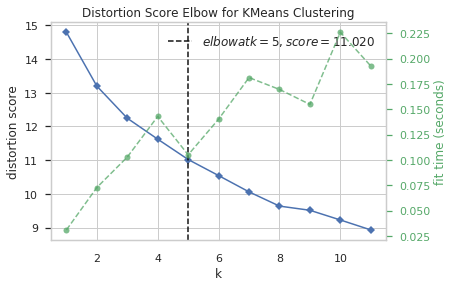

In [661]:
#The elbow method
NYC_grouped_clustering = NYC_grouped.drop('Neighborhood', 1)
NYC_model = KMeans(random_state=1)
plt.figure(figsize=(6,4))
visualizer = KElbowVisualizer(NYC_model, k=(1,12)).fit(NYC_grouped_clustering).show() # Fit the data to the visualizer

The optimum number of clusters for NYC is 5. Now let's look at these clusters.

In [547]:
#Conduct the cluster analysis using the optimum number
kclusters = 5 # set number of clusters
NYC_kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(NYC_grouped_clustering) # run k-means clustering
NYC_kmeans.labels_[0:10] # check cluster labels generated for each row in the dataframe

array([3, 4, 1, 4, 1, 3, 2, 1, 2, 1], dtype=int32)

In [551]:
NYC_sorted.insert(0, 'Cluster Labels', NYC_kmeans.labels_) # add clustering labels
NYC_merged = NYC_neig
# merge to add latitude/longitude for each neighborhood
NYC_merged = NYC_merged.join(NYC_sorted.set_index('Neighborhood'), on='Neighborhood')
#NYC_merged.head()

,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Wakefield,40.894705,-73.847201,3,Deli / Bodega,Fast Food Restaurant,Pizza Place,Chinese Restaurant,Fried Chicken Joint,Caribbean Restaurant,Food,Donut Shop,Sandwich Place,Asian Restaurant
1,Co-op City,40.874294,-73.829939,3,Pizza Place,Deli / Bodega,Fast Food Restaurant,Chinese Restaurant,Bakery,BBQ Joint,Mexican Restaurant,Seafood Restaurant,Fried Chicken Joint,Caribbean Restaurant
2,Eastchester,40.887556,-73.827806,3,Caribbean Restaurant,Pizza Place,Diner,Deli / Bodega,Fast Food Restaurant,Chinese Restaurant,Café,Donut Shop,Sandwich Place,Asian Restaurant
3,Fieldston,40.895437,-73.905643,4,Deli / Bodega,Pizza Place,Mexican Restaurant,Sandwich Place,Chinese Restaurant,Wings Joint,Sushi Restaurant,Donut Shop,Restaurant,Fast Food Restaurant
4,Riverdale,40.890834,-73.912585,1,Pizza Place,Deli / Bodega,Mexican Restaurant,Diner,Italian Restaurant,Sandwich Place,Japanese Restaurant,Food,Bagel Shop,Burger Joint


In [640]:
#sometimes clusters can result in NaN, make sure to exclude them
NYC_merged=NYC_merged.dropna()

In [627]:
# create map
NYC_clusters = folium.Map(location=[NYC_latitude, NYC_longitude], zoom_start=10)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(NYC_merged['Latitude'], NYC_merged['Longitude'], NYC_merged['Neighborhood'], NYC_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon], radius=5,
        popup=label, color=rainbow[cluster-1],
        fill=True, fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(NYC_clusters)
       
NYC_clusters

#### 2. San Francisco

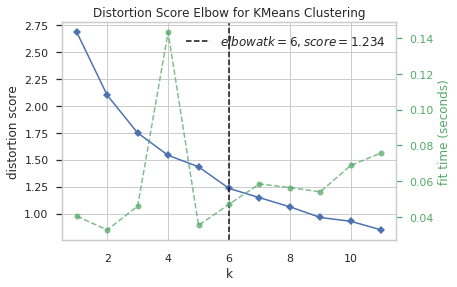

In [662]:
#The elbow method
SF_grouped_clustering = SF_grouped.drop('Neighborhood', 1)
SF_model = KMeans(random_state=1)
plt.figure(figsize=(6,4))
visualizer = KElbowVisualizer(SF_model, k=(1,12)).fit(SF_grouped_clustering).show() # Fit the data to the visualizer

The optimum number of clusters for SF is 6. Now let's look at these clusters.

In [682]:
#Conduct the cluster analysis using the optimum number
kclusters = 6 # set number of clusters
SF_kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(SF_grouped_clustering) # run k-means clustering
SF_kmeans.labels_[0:10] # check cluster labels generated for each row in the dataframe

array([3, 3, 0, 3, 0, 3, 0, 3, 0, 3], dtype=int32)

In [686]:
SF_sorted.insert(0, 'Cluster Labels', SF_kmeans.labels_) # add clustering labels
SF_merged = SF_neig
# merge to add latitude/longitude for each neighborhood
SF_merged = SF_merged.join(SF_sorted.set_index('Neighborhood'), on='Neighborhood')
#SF_merged.head()

In [689]:
#sometimes clusters can result in NaN, make sure to exclude them
SF_merged=SF_merged.dropna()

In [679]:
SF_clusters = folium.Map(location=[SF_latitude, SF_longitude], zoom_start=12)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(SF_merged['Latitude'], SF_merged['Longitude'], SF_merged['Neighborhood'], SF_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon], radius=5,
        popup=label, color=rainbow[int(cluster)-1],
        fill=True, fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(SF_clusters)
       
SF_clusters

#### 3. Los Angeles

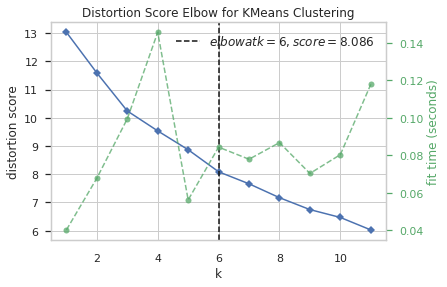

In [663]:
#The elbow method
LA_grouped_clustering = LA_grouped.drop('Neighborhood', 1)
LA_model = KMeans(random_state=1)
plt.figure(figsize=(6,4))
visualizer = KElbowVisualizer(LA_model, k=(1,12)).fit(LA_grouped_clustering).show() # Fit the data to the visualizer

The optimum number of clusters for LA is 6. Now let's look at these clusters.

In [691]:
#Conduct the cluster analysis using the optimum number
kclusters = 6 # set number of clusters
LA_kmeans = KMeans#Conduct the cluster analysis using the optimum number
kclusters = 6 # set number of clusters
LA_kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(LA_grouped_clustering) # run k-means clustering
LA_kmeans.labels_[0:10] # check cluster labels generated for each row in the dataframe(n_clusters=kclusters, random_state=1).fit(LA_grouped_clustering) # run k-means clustering

array([2, 1, 3, 3, 1, 1, 0, 5, 1, 4], dtype=int32)

In [635]:
LA_sorted.insert(0, 'Cluster Labels', LA_kmeans.labels_) # add clustering labels
LA_merged = LA_neig
# merge to add latitude/longitude for each neighborhood
LA_merged = LA_merged.join(LA_sorted.set_index('Neighborhood'), on='Neighborhood')
#LA_merged.head()

In [638]:
#sometimes clusters can result in NaN, make sure to exclude them
LA_merged=LA_merged.dropna()

In [639]:
# create map
LA_clusters = folium.Map(location=[LA_latitude, LA_longitude], zoom_start=10)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(LA_merged['Latitude'], LA_merged['Longitude'], LA_merged['Neighborhood'], LA_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon], radius=5,
        popup=label, color=rainbow[int(cluster)-1],
        fill=True, fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(LA_clusters)
       
LA_clusters

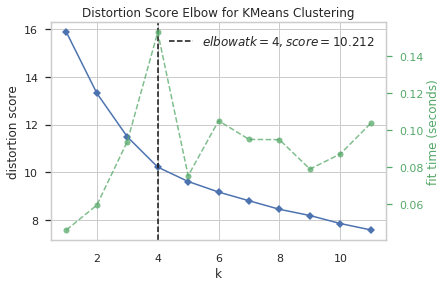

In [692]:
#The elbow method
CHI_grouped_clustering = CHI_grouped.drop('Neighborhood', 1)
plt.figure(figsize=(6,4))
CHI_model = KMeans(random_state=1)
visualizer = KElbowVisualizer(CHI_model, k=(1,12)).fit(CHI_grouped_clustering).show()  # Fit the data to the visualizer

In [694]:
#Conduct the cluster analysis using the optimum number
kclusters = 4 # set number of clusters
CHI_kmeans = KMeans(n_clusters=kclusters, random_state=1).fit(CHI_grouped_clustering) # run k-means clustering
CHI_kmeans.labels_[0:10] # check cluster labels generated for each row in the dataframe

array([2, 1, 2, 3, 2, 0, 0, 0, 2, 2], dtype=int32)

In [695]:
CHI_sorted.insert(0, 'Cluster Labels', CHI_kmeans.labels_) # add clustering labels
CHI_merged = CHI_neig
# merge to add latitude/longitude for each neighborhood
CHI_merged = CHI_merged.join(CHI_sorted.set_index('Neighborhood'), on='Neighborhood')

In [696]:
#sometimes clusters can result in NaN, make sure to exclude them
CHI_merged=CHI_merged.dropna()

In [708]:
CHI_clusters = folium.Map(location=[CHI_latitude, CHI_longitude], zoom_start=10)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(CHI_merged['Latitude'], CHI_merged['Longitude'], CHI_merged['Neighborhood'], CHI_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon], radius=5,
        popup=label, color=rainbow[int(cluster)-1],
        fill=True, fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(CHI_clusters)
       
CHI_clusters

### Cluster Examination
In this section, I will examine the content of clusters for each city. I look at the frequency of each venue category per cluster. To do this, I create a dataset that has frequencies of each venue type.
#### 1. New York City

In [588]:
NYC_df_cluster = pd.merge(NYC_grouped,NYC_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
NYC_df_cluster = NYC_df_cluster.iloc[:,1:].groupby('Cluster Labels').mean().transpose()
NYC_df_cluster.head()

Cluster Labels,0,1,2,3,4
Afghan Restaurant,0.0,0.000000,0.000526,0.000000,0.000786
African Restaurant,0.0,0.000345,0.001010,0.001533,0.000000
American Restaurant,0.0,0.023077,0.043204,0.016217,0.047149
Arepa Restaurant,0.0,0.000213,0.001883,0.000122,0.000777
Argentinian Restaurant,0.0,0.000000,0.002561,0.000000,0.000000


In [711]:
def plot_bar(clusterdata,clusternumber):
    sns.set(style="whitegrid",rc={'figure.figsize':(20,10)})
    df = clusterdata[[clusternumber]].drop(clusterdata[[clusternumber]][clusterdata[clusternumber]==0].index)
    df = df.sort_values(clusternumber, ascending = False).iloc[0:15]
    chart = sns.barplot(x=df.index, y=clusternumber, data=df)
    chart.set_xticklabels(chart.get_xticklabels(),rotation=90)

Cluster 0
There are 1 neighborhoods in this cluster


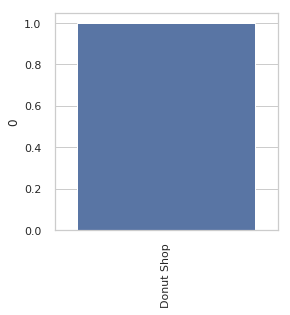

Cluster 1
There are 58 neighborhoods in this cluster


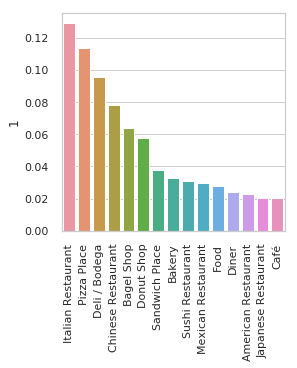

Cluster 2
There are 99 neighborhoods in this cluster


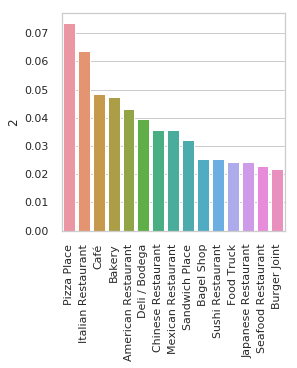

Cluster 3
There are 82 neighborhoods in this cluster


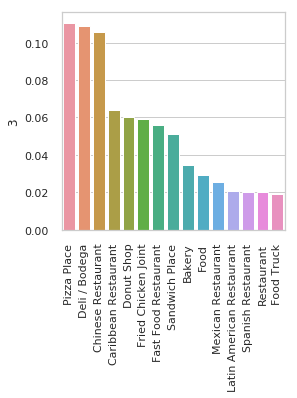

Cluster 4
There are 66 neighborhoods in this cluster


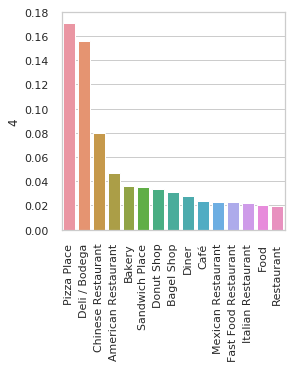

In [712]:
for i in range(5):
    print('Cluster '+str(i))
    print('There are {} neighborhoods in this cluster'.format(NYC_merged[NYC_merged['Cluster Labels']==i].shape[0]))
    plt.figure(figsize = (4,4))
    plot_bar(NYC_df_cluster,i)
    plt.show()

#### 2. San Francisco

In [680]:
SF_df_cluster = pd.merge(SF_grouped,SF_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
SF_df_cluster = SF_df_cluster.iloc[:,1:].groupby('Cluster Labels').mean().transpose()
SF_df_cluster.head()

Cluster Labels,0.0,2.0,3.0,4.0,5.0
Afghan Restaurant,0.000000,0.0,0.000541,0.000,0.0
African Restaurant,0.003019,0.0,0.000811,0.000,0.0
American Restaurant,0.010692,0.0,0.032925,0.125,0.0
Arepa Restaurant,0.000000,0.0,0.000541,0.000,0.0
Argentinian Restaurant,0.000000,0.0,0.001909,0.000,0.0


Cluster 0
There are 12 neighborhoods in this cluster


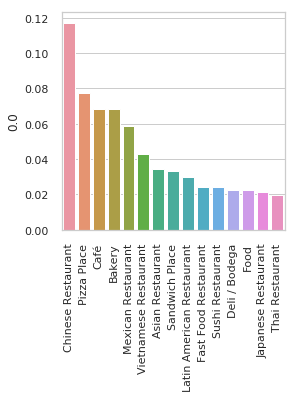

Cluster 2
There are 1 neighborhoods in this cluster


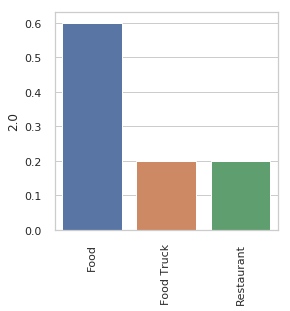

Cluster 3
There are 37 neighborhoods in this cluster


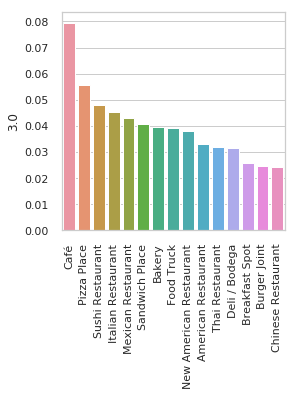

Cluster 4
There are 1 neighborhoods in this cluster


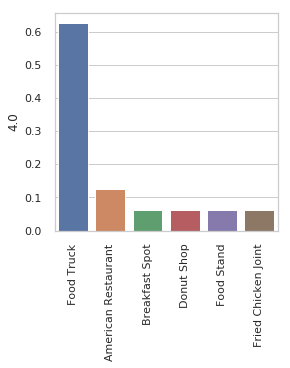

Cluster 5
There are 1 neighborhoods in this cluster


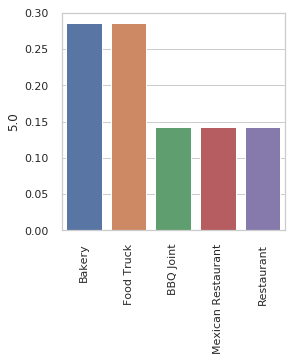

In [706]:
clusters = [0,2,3,4,5]
for i in clusters:
    print('Cluster '+str(i))
    print('There are {} neighborhoods in this cluster'.format(SF_merged[SF_merged['Cluster Labels']==i].shape[0]))
    plt.figure(figsize = (4,4))
    plot_bar(SF_df_cluster,i)
    plt.show()

#### 3. Los Angeles

In [641]:
LA_df_cluster = pd.merge(LA_grouped,LA_merged[['Neighborhood','Cluster Labels']],left_on='Neighborhood', right_on='Neighborhood',how='inner')
LA_df_cluster = LA_df_cluster.iloc[:,1:].groupby('Cluster Labels').mean().transpose()
LA_df_cluster.head()

Cluster Labels,0.0,1.0,2.0,3.0,4.0,5.0
American Restaurant,0.000000,0.050205,0.037075,0.015010,0.009804,0.002500
Argentinian Restaurant,0.000000,0.001266,0.000000,0.000000,0.000000,0.000000
Asian Restaurant,0.000000,0.017178,0.014463,0.019632,0.009804,0.023824
Australian Restaurant,0.000000,0.000191,0.000000,0.000000,0.000000,0.000000
BBQ Joint,0.028571,0.006949,0.007380,0.004692,0.000000,0.007941


Cluster 0
There are 7 neighborhoods in this cluster


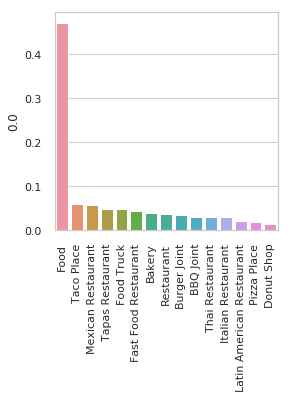

Cluster 1
There are 67 neighborhoods in this cluster


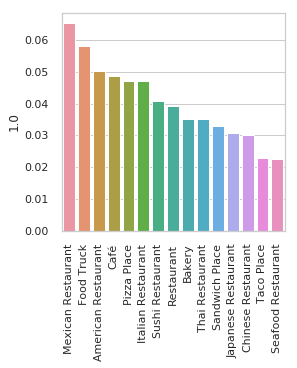

Cluster 2
There are 41 neighborhoods in this cluster


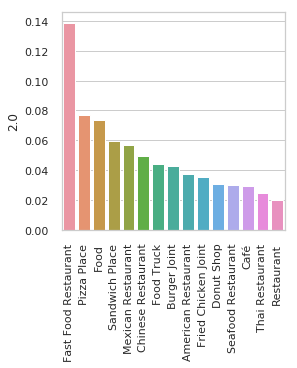

Cluster 3
There are 21 neighborhoods in this cluster


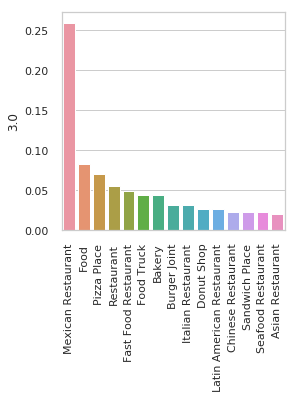

Cluster 4
There are 3 neighborhoods in this cluster


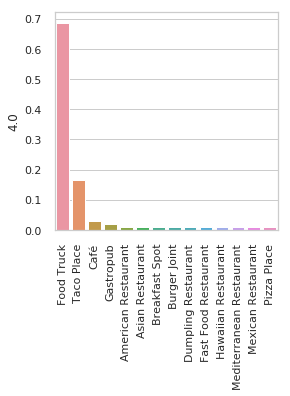

Cluster 5
There are 4 neighborhoods in this cluster


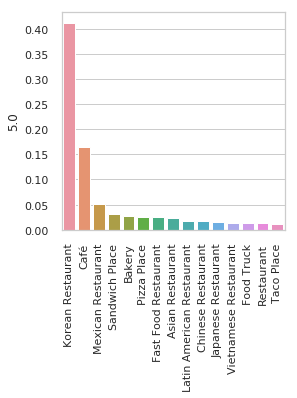

In [705]:
for i in range(6):
    print('Cluster '+str(i))
    print('There are {} neighborhoods in this cluster'.format(LA_merged[LA_merged['Cluster Labels']==i].shape[0]))
    plt.figure(figsize = (4,4))
    plot_bar(LA_df_cluster,i)
    plt.show()

#### 4. Chicago

In [698]:
CHI_df_cluster = pd.merge(CHI_grouped,CHI_merged[['Neighborhood','Cluster Labels']],
                          left_on='Neighborhood', right_on='Neighborhood',how='inner')
CHI_df_cluster = CHI_df_cluster.iloc[:,1:].groupby('Cluster Labels').mean().transpose()
CHI_df_cluster.head()

Cluster Labels,0.0,1.0,2.0,3.0
Afghan Restaurant,0.000000,0.0,0.000125,0.000000
African Restaurant,0.006121,0.0,0.001104,0.000000
American Restaurant,0.056380,0.0,0.048619,0.049851
Arepa Restaurant,0.000000,0.0,0.000507,0.000000
Argentinian Restaurant,0.000000,0.0,0.002165,0.000000


Cluster 0
There are 46 neighborhoods in this cluster


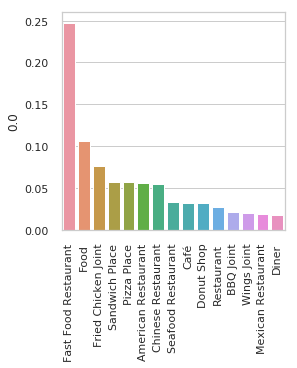

Cluster 1
There are 3 neighborhoods in this cluster


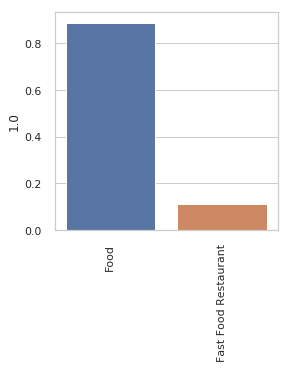

Cluster 2
There are 138 neighborhoods in this cluster


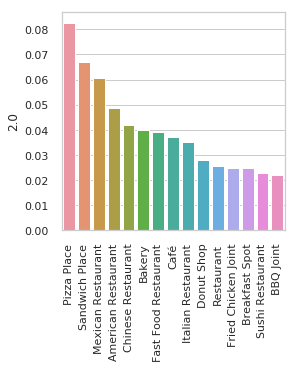

Cluster 3
There are 37 neighborhoods in this cluster


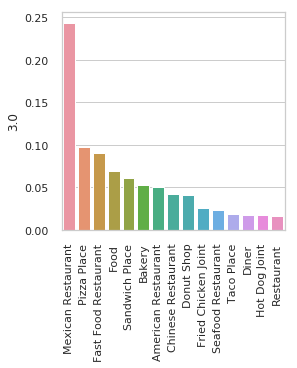

In [704]:
for i in range(4):
    print('Cluster '+str(i))
    print('There are {} neighborhoods in this cluster'
          .format(CHI_merged[CHI_merged['Cluster Labels']==i].shape[0]))
    plt.figure(figsize = (4,4))
    plot_bar(CHI_df_cluster,i)
    plt.show()

## IV. Results

In this project, I conducted four k-means cluster analyses for four cities to describe restaurant clusters within these cities.

### 1. New York City

There are five clusters in New York City; however, Cluster 0 is not informative. There is only one neighborhood in this cluster with a single donut shop. Examining remaining four clusters, Italian restaurants, pizza places and delis dominate all four of them. Cluster 1 has 58 neighborhoods, and relatively high numbers of Chinese restaurants as well as bagel and donut shops. Cluster 2 has 99 neighborhoods and is the most diverse cluster. Besides Italian restaurants, pizza places and delis, it offers cafes, bakeries, and decent amount of American, Chinese and Mexican restaurants as well as sandwich places. Cluster 3 has 82 neighborhoods and offers Caribbean cuisine as well as fried chicken and fast food options. Lastly, Cluster 4 has 66 neighborhoods, and is not much diverse. The restaurant scene is mostly dominated by pizza places and delis, followed by Chinese restaurants.


### 2. San Francisco

Although I conducted a k-means analysis with six clusters for San Francisco, the algorithm found only five clusters in San Francisco and did not cluster any neighborhoods within Cluster 1. Furthermore, there were multiple neighborhoods that were not identified as parts of any clusters. Examining existing clusters, we see that Cluster 0 has 12 neighborhoods and is relatively diverse. Although there are a lot of Chinese restaurants, other options as pizza, Mexican and Vietnamese restaurants are available. Cluster 3 is the most diverse cluster in San Francisco. There are similar amounts of pizza, sushi, sandwich options as well as Italian and Mexican restaurants. Clusters 2 and 4 only have a single neighborhood and are not informative.

### 3. Los Angeles

There are six clusters in Los Angeles; however, Clusters 0 and 4 are not informative because the most frequent categories are ‘food’ or ‘food truck’. Cluster 1 has 67 neighborhoods in it, and is quite diverse with Mexican, American, Italian, Japanese, Thai, Chinese, pizza and sushi restaurants. Cluster 2 has 41 neighborhoods that most frequently have Mexican and Chinese restaurants as well as fast food, and pizza and sandwich places. Cluster 3 includes 21 neighborhoods and is dominated by Mexican places without much diversity. Lastly, Cluster 5 has 4 neighborhoods and is dominated by Korean restaurants.

### 4. Chicago

There are four clusters in Chicago; however, Cluster 1 is not informative. Examining other clusters, Cluster 0 has 46 neighborhoods which are dominated by fast food restaurants followed by fried chicken, pizza and sandwich places as well as Chinese and American restaurants. Cluster 2 is the most crowded cluster with 136 neighborhoods and offers pizza and sandwich places as well as Chinese, Mexican and American restaurants. Lastly, Cluster 3 is dominated by Mexican restaurants followed by sandwich and fast food places.

## V. Discussion

Our business problem was to determine the city with more diverse cuisine to launch a new food delivery startup. A direct way to determine diversity of the restaurant scene is to look at the number of different clusters. By doing this, we can assume that the more clusters there are, the more diversity there is. Using this method, we would conclude that LA is the city with more diverse cuisine because it has 6 clusters. However, only using cluster number without examining the content might lead to wrong conclusions. For instance, some clusters do not give much information about cuisine diversity. Therefore, after conducting the cluster analyses, I also examined the content of each cluster to understand the available cuisines as well as the number of neighborhoods in each cluster. 

Based on this metric, I recommend Los Angeles for the launch of the startup because Los Angeles has the most differences amongst clusters. It also has a very diverse cluster that includes 66 neighborhoods. This suggests that many restaurant options from various categories are available within that cluster. 

## VI. Conclusion

In this project, I used cluster analysis to describe frequencies of different food venue categories within four metropolitan cities and made a location recommendation. Cluster analysis allows us to describe our data in a more meaningful way and similar business problems can be solved by using the approach I demonstrated here. To name a few examples, these business questions might be where to open a certain type of restaurant, or how similar and dissimilar certain neighborhoods or cities are.


